### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import feature
from skimage import exposure
from skimage.filters import unsharp_mask
from keras.applications import VGG19
import cv2
import os
import pickle

2024-07-22 08:40:53.329308: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Select Preprocessing Options

In [2]:
# Convert the images from rgb to single channel grayscale
grayscale_flg = 1

# Perform histogram equalization
histogram_eq_flg = 1

# Scale pixel values from between 0-1 to 0-255
scaling_flg = 1

# Resize the image to the provided dimensions
resize_flg = 1
resize_shape = (256, 256)

# Sharpen image using unsharp masking with provided Gaussian filter
unsharp_mask_flg = 1
unsharp_radius = 2
unsharp_amount = 1

### Load Images

In [3]:
def load_image(image_path):
    return plt.imread(file_path)

### Convert Images to Grayscale

In [4]:
def rgb2gray(image):
    return np.mean(image, axis=2)

### Scale Pixel Values between 0 and 255

In [5]:
def scale(image):
    return image * 255

### Resize Images

In [6]:
def resize(image, size):
    return cv2.resize(image, size)

### Histogram Equalization

In [7]:
def histEqual(image):
    return cv2.equalizeHist(image)

### Unsharp Masking

In [8]:
def unsharp(image, radius, amount):
    return unsharp_mask(image, radius, amount)

### Preprocess Images

Image Preprocessing Selections:
Grayscale Conversion
Histogram Equalization
Scaled to 0-255
Resized to (256, 256)
Unsharp Masking - Radius: 2 Amount: 1

Loaded 10 images into dictionary: images['Hairline Fracture']['Test']
Loaded 101 images into dictionary: images['Hairline Fracture']['Train']
Loaded 19 images into dictionary: images['Fracture Dislocation']['Test']
Loaded 137 images into dictionary: images['Fracture Dislocation']['Train']
Loaded 18 images into dictionary: images['Pathological fracture']['Test']
Loaded 116 images into dictionary: images['Pathological fracture']['Train']
Loaded 16 images into dictionary: images['Greenstick fracture']['Test']
Loaded 106 images into dictionary: images['Greenstick fracture']['Train']
Loaded 12 images into dictionary: images['Spiral Fracture']['Test']
Loaded 74 images into dictionary: images['Spiral Fracture']['Train']
Loaded 9 images into dictionary: images['Impacted fracture']['Test']
Loaded 75 images into dictionary: images['Impacted frac

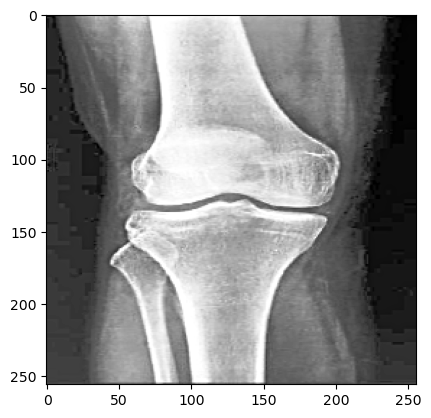

In [9]:
root_dir = './data/Bone Break Classification'

# Initialize dictionary to store images
images = {}

# Print preprocessing selections
print('Image Preprocessing Selections:')
if grayscale_flg:
    print('Grayscale Conversion')
if histogram_eq_flg:
    print('Histogram Equalization')
if scaling_flg:
    print('Scaled to 0-255')
if resize_flg:
    print('Resized to', resize_shape)
if unsharp_mask_flg:
    print('Unsharp Masking - Radius:', unsharp_radius, 'Amount:', unsharp_amount)
print()

# Iterates through the different bone fracture folders
for folder in os.listdir(root_dir):

    folder_path = os.path.join(root_dir, folder)
    images[folder] = {}

    # Iterates through the test and train folders for each bone fracture type
    for subfolder in os.listdir(folder_path):

        if subfolder.startswith('.'):
            continue
            
        subfolder_path = os.path.join(folder_path, subfolder)
        images[folder][subfolder] = []

        # Iterates through images in folder
        for file in os.listdir(subfolder_path):

            if file.endswith('.jpg'):

                file_path = os.path.join(subfolder_path, file)
                
                img = load_image(file_path)
                
                if grayscale_flg:
                    img = rgb2gray(img)
                    
                if histogram_eq_flg:
                    img = histEqual(np.array(img, dtype=np.uint8))

                if resize_flg:
                    img = resize(img, resize_shape)

                if unsharp_mask_flg:
                    img = unsharp_mask(img, unsharp_radius, unsharp_amount)

                if scaling_flg:
                    img = scale(img)
                
                images[folder][subfolder].append(np.array(img))

        print(f'Loaded {len(images[folder][subfolder])} images into dictionary: images[\'{folder}\'][\'{subfolder}\']')

sample_image = images['Avulsion fracture']['Train'][10]
print()
print('Sample Image: Avulsion fracture')
print(f'Image shape: {sample_image.shape}')
print(f'Max pixel value: {np.max(sample_image)}, Min pixel value: {np.min(sample_image)}')
plt.imshow(sample_image, cmap='gray')
pass

### Feature Extraction Options

In [10]:
# Extract edge detection features
edge_detect_flg = 1
edge_lower_thresh = 100
edge_upper_thresh = 150
edge_apeture = 5

# Extract histogram of oriented gradients features
hog_flg = 1
hog_orientations = 9
hog_pixels_per_cell = (8, 8)
hog_cells_per_block = (2, 2)

# Extract local binary pattern features
lbp_flg = 1
lbp_radius = 3

# Extract VGG19 features
vgg_flg = 1
image_size = (256, 256)
model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

### Print Feature Options

In [11]:
def print_feature_options(out_path):
    f = open(os.path.join(out_path, "feature_selections.txt"), "w")
    
    if edge_detect_flg:
        f.write('Image Edges Extracted \n')
        f.write(f'Lower threshold: {edge_lower_thresh} \n')
        f.write(f'Upper threshold: {edge_upper_thresh} \n')
        f.write(f'Apeture: {edge_apeture} \n')
        f.write('\n')

    if hog_flg:
        f.write('Image Histogram of Oriented Gradients Extracted \n')
        f.write(f'Orientations: {hog_orientations} \n')
        f.write(f'Pixels per Cell: {hog_pixels_per_cell} \n')
        f.write(f'Cells per Block: {hog_cells_per_block} \n')
        f.write('\n')

    if lbp_flg:
        f.write('Image Local Binary Pattern Extracted \n')
        f.write(f'Radius: {lbp_radius} \n')
        f.write('\n')

    if vgg_flg:
        f.write('Image VGG19 Features Extracted \n')
        f.write(f'Image size: {image_size}\n')
        f.write('\n')
        

### Edge Detection

In [12]:
def get_edges(image, lower_thresh, upper_thresh, apeture):
    return cv2.Canny(image, lower_thresh, upper_thresh, apeture)

### HOG

In [13]:
def get_hog(image, orientations, pixels_per_cell, cells_per_block):
    fd, hog_image = feature.hog(image=image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                  cells_per_block=cells_per_block, visualize=True)

    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_image

### Local Binary Pattern

In [14]:
def get_lbp(image, radius):
    return feature.local_binary_pattern(image, 5*radius, radius)

### VGG19 Features

In [15]:
def get_vgg(image, image_size):
    img = skimage.color.gray2rgb(image)
    features = model.predict(img.reshape((1, image_size[0], image_size[1], 3)))
    return features

### Extract Features

In [17]:
x_train = []
y_train = []

x_test = []
y_test = []

output_path = './test_train_data/dataset_3'
print_feature_options(output_path)

for fracture in images:

    for folder in images[fracture]:

        image_feat_count = 0
        total_images = len(images[fracture][folder])
        
        for image in images[fracture][folder]:
            
            print(f'{image_feat_count} / {total_images} Image feature extracted for images[{fracture}][{folder}]')
            image_feat_count += 1

            image_feats = {}

            image_feats['image'] = image

            if edge_detect_flg:
                edges = np.array(get_edges(np.array(image, dtype=np.uint8), edge_lower_thresh, edge_upper_thresh, edge_apeture))
                image_feats['edges'] = edges

            if hog_flg:
                hog = get_hog(image, hog_orientations, hog_pixels_per_cell, hog_cells_per_block)
                image_feats['hog'] = hog

            if lbp_flg:
                lbp = get_lbp(image, lbp_radius)
                image_feats['lbp'] = lbp

            if vgg_flg:
                vgg_feats = get_vgg(image, image_size)
                image_feats['vgg19'] = vgg_feats
                
            if folder == 'Train':
                x_train.append(image_feats)
                y_train.append(fracture)
            else:
                x_test.append(image_feats)
                y_test.append(fracture)

with open(os.path.join(output_path, 'x_train.pickle'), 'wb') as handle:
    pickle.dump(x_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(os.path.join(output_path, 'y_train.pickle'), 'wb') as handle:
    pickle.dump(y_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(os.path.join(output_path, 'x_test.pickle'), 'wb') as handle:
    pickle.dump(x_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(os.path.join(output_path, 'y_test.pickle'), 'wb') as handle:
    pickle.dump(y_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

0 / 10 Image feature extracted for images[Hairline Fracture][Test]


/opt/anaconda3/lib/python3.11/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1 / 10 Image feature extracted for images[Hairline Fracture][Test]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
2 / 10 Image feature extracted for images[Hairline Fracture][Test]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
3 / 10 Image feature extracted for images[Hairline Fracture][Test]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
4 / 10 Image feature extracted for images[Hairline Fracture][Test]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
5 / 10 Image feature extracted for images[Hairline Fracture][Test]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
6 / 10 Image feature extracted for images[Hairline Fracture][Test]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
7 / 10 Image feature extracted for images[Hairline Fracture][Test]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
8 / 10 Image feature extracted for images[Hairline Fracture][Test]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
9 / 10 Image feature extracted for images[Hairline Fracture][Test]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
0 / 101 Im